In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# define coorinate points
p0 = [149.4, 129.4]
p1 = [149.4, 80.6]
p2 = [100.6, 80.6]
p3 = [100.6, 129.4]

In [24]:
def getAngle(current, next):
    x = next[0] - current[0]
    y = next[1] - current[1]
    angle = np.arctan2(y, x)
    angle = np.rad2deg(angle)
    return angle

In [25]:
# evaluate angles
angle0 = getAngle(p0, p1)
angle1 = getAngle(p1, p2)
angle2 = getAngle(p2, p3)
angle3 = getAngle(p3, p0)

print(angle0)
print(angle1)
print(angle2)
print(angle3)

print("Normalized angles:")
angle0 = np.mod(angle0, 360)
angle1 = np.mod(angle1, 360)
angle2 = np.mod(angle2, 360)
angle3 = np.mod(angle3, 360)

print(angle0)
print(angle1)
print(angle2)
print(angle3)


-90.0
180.0
90.0
0.0
Normalized angles:
270.0
180.0
90.0
0.0


(25.0, 135.0, 25.0, 135.0)

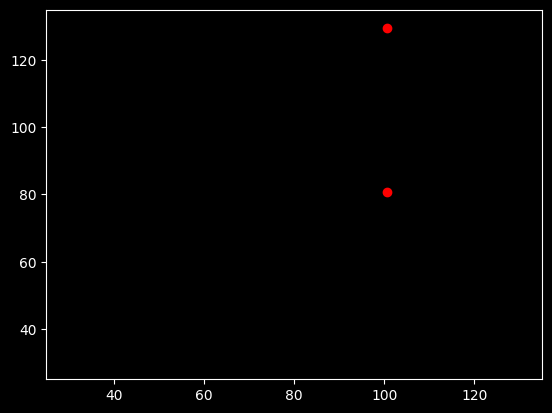

In [26]:
# plot points
x = [p0[0], p1[0], p2[0], p3[0]]
y = [p0[1], p1[1], p2[1], p3[1]]
plt.plot(x, y, 'ro')
plt.axis([25, 135, 25, 135])

In [27]:
def calcAngle(x0, y0, x1, y1):
    newAngle = np.arctan2((y1-y0),(x1-x0))
   
    # convert to degrees
    newAngle = np.rad2deg(newAngle)
    
    # normalize angle
    newAngle = np.mod(newAngle, 360)
    
    return newAngle

In [28]:
print(calcAngle(p0[0], p1[0], p0[1], p1[1]))

253.790975072192


In [29]:
a = calcAngle(0, 0, 100, 100)
print(a)

45.0


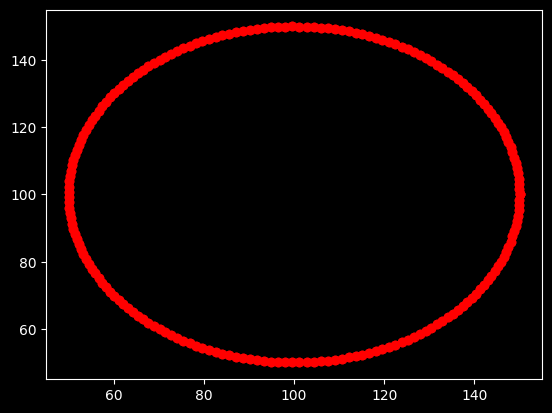

In [30]:
# Export a string with G1 Xcoords Ycoords Fspeed and Aangle for X and Y coords on a circle

# define coorinate points
radius = 50
n = 200

# linspace for cirlce radius
s = radius
a = np.linspace(0, 2*np.pi, n)
# traspose a
a_t = np.flip(a)

#combine a and a_t
a = np.concatenate((a, a_t), axis=0)

aabs = 0
x = s*np.cos(a)
y = s*np.sin(a)

# offset points
x0 = 100
y0 = 100

x = x + x0
y = y + y0

# plot points
plt.plot(x, y, 'ro')

# delete circle.txt file
import os
if os.path.exists("circle.txt"):
    os.remove("circle.txt")

# turn on a laser
with open("circle.txt", "a") as myfile:
    myfile.write("M106 P4 S1")
    myfile.write("\n")
    myfile.close()

# for each angle create string
for i in range(len(x)-1):
    i+= 1

    aabs += a[i]-a[i-1]
    if(i == a.shape[0]/2):
        string = ("M106 P4 S0\nM106 P2 S1")
        with open("circle.txt", "a") as myfile:
            myfile.write(string)
            myfile.write("\n")

    string = ("G1 X" + str(x[i]) + " Y" + str(y[i]) + " F1800 A" + str(np.rad2deg(aabs)))
    
    # save string to file
    with open("circle.txt", "a") as myfile:
        myfile.write(string)
        myfile.write("\n")
with open("circle.txt", "a") as myfile:
        myfile.write("M106 P2 S0")
        myfile.write("\n")

0.0

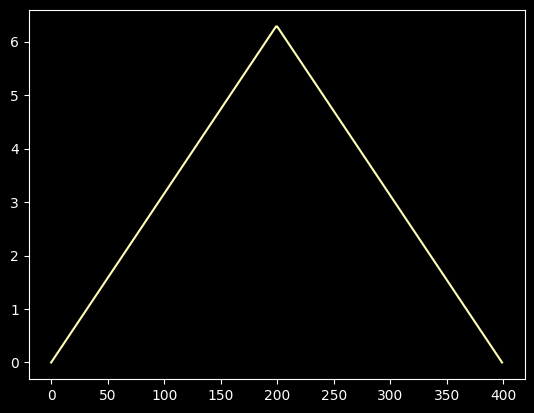

In [31]:
plt.plot(aabs)
plt.plot(a)

aabs


In [32]:
X0 = 148.819
Y0 = 84.897
X1 = 145.102 
Y1 = 81.18

In [33]:
print(calcAngle(X0,Y0,X1,Y1))

225.0000000000001


In [34]:
targetAngle = -0.005
currentAngles = np.array([0,90,180,270])
off = 90

currentAngles += off


# find the closest angle in the list of angles
anglesAbsolute = currentAngles - targetAngle
deltasModul = np.mod(anglesAbsolute,360)


closestAngleIndx = np.argmin(deltasModul)
closestAngle = currentAngles[closestAngleIndx]

# calculte delta bewteen target and closest angle
deltaAngle = targetAngle - closestAngle


if(deltaAngle > 45.5):
    print("Line: " + str(i) + "DeltaAngle is bigger than 5°: " + str(deltaAngle) + " target: " + str(targetAngle))

# update the angle of the laser
#LaserObj.updateAngles(deltaAngle)

print(closestAngleIndx, deltaAngle, currentAngles)

3 -360.005 [ 90 180 270 360]


In [35]:
target = 22.5
currentAngles = np.array([00,90,180,270])
offset = 0
currentAngles += offset



In [36]:
target = 0.005
a0 = np.array([0.00,90.0,180.0,270.0])
off = 0
a0 = a0 + off
ad = a0 - target
#a0 = [-359, -269,-179,-89]
a0m = np.mod(ad,360)
print(ad)
print(a0m)
print("argmin: " + str(np.argmin(a0m)))

[-5.00000e-03  8.99950e+01  1.79995e+02  2.69995e+02]
[359.995  89.995 179.995 269.995]
argmin: 1


[100 190 280  10]


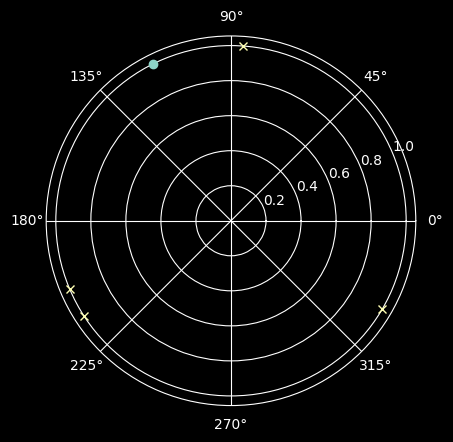

In [37]:
tmp = [-350, -260, -170, -80]

tmp = np.array(tmp)

tmp += 90
tmpMod = np.mod(tmp,360)
print(np.mod(tmp,360))



def display(target, lasers):
    r = 1
    ro = np.ones(np.size(lasers))
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(target, r, 'o')
    ax.plot(lasers, ro,'x')

lasers = [0,90,180,270]

display(90, tmpMod)

In [38]:
def findClosestAngle(soll, ist):
    soll = np.array(soll)
    ist = np.array(ist)
    ist_origin = ist
    soll_origin = soll
    
    
    soll = np.mod(soll,360)
    ist = np.mod(ist,360)
    
    
    delta = soll-ist
    tmp = np.zeros(np.size(delta))
    #print(delta)
    for i in range(np.size(delta)):
        d = delta[i]
        if(d < -180):
            d += 360
            a = -1
            #print("case 1")

        if(d >= 180):
            d -= 360
            #print("case 2")
        tmp[i] = d
    delta = tmp
    # closest
    closetIndx = np.argmin(np.abs(delta))
    deltaAngle = delta[closetIndx]

    # if((ist_origin[closetIndx]-soll_origin)<0):
    #     deltaAngle *= -1

    print("ist: " + str(ist) + " soll: " + str(soll_origin) + " delta: " + str(delta) + " indx:" + str(closetIndx)+ " deltaMov: " + str(deltaAngle))

In [39]:
ist = [0,90,180,270]
ist = np.array(ist)
soll = [0,-5,5,355,-355,180,-180,179,-179,-168,10]
#soll = [-179]

for s in soll:
    findClosestAngle(s,ist)

ist: [  0  90 180 270] soll: 0 delta: [   0.  -90. -180.   90.] indx:0 deltaMov: 0.0
ist: [  0  90 180 270] soll: -5 delta: [ -5. -95. 175.  85.] indx:0 deltaMov: -5.0
ist: [  0  90 180 270] soll: 5 delta: [   5.  -85. -175.   95.] indx:0 deltaMov: 5.0
ist: [  0  90 180 270] soll: 355 delta: [ -5. -95. 175.  85.] indx:0 deltaMov: -5.0
ist: [  0  90 180 270] soll: -355 delta: [   5.  -85. -175.   95.] indx:0 deltaMov: 5.0
ist: [  0  90 180 270] soll: 180 delta: [-180.   90.    0.  -90.] indx:2 deltaMov: 0.0
ist: [  0  90 180 270] soll: -180 delta: [-180.   90.    0.  -90.] indx:2 deltaMov: 0.0
ist: [  0  90 180 270] soll: 179 delta: [179.  89.  -1. -91.] indx:2 deltaMov: -1.0
ist: [  0  90 180 270] soll: -179 delta: [-179.   91.    1.  -89.] indx:2 deltaMov: 1.0
ist: [  0  90 180 270] soll: -168 delta: [-168.  102.   12.  -78.] indx:2 deltaMov: 12.0
ist: [  0  90 180 270] soll: 10 delta: [  10.  -80. -170.  100.] indx:0 deltaMov: 10.0


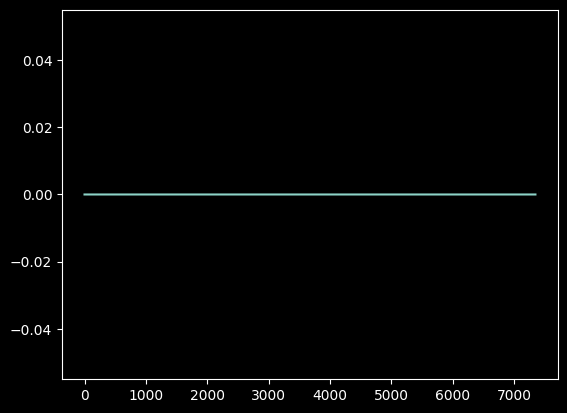

In [40]:
# read text file
As = []
filename = "PI3MK3M_Tensile_Testing_V4_processed.gcode"
with open(filename, "r") as myfile:
    data = myfile.readlines()
    for line in data:
        if 'A' in line:
            try:
                a = float(line.split('A')[-1].split(' ')[0])
                As.append(a)
            except:
                pass

plt.plot(As)





